<a href="https://colab.research.google.com/github/Jai-Keshav-Sharma/ML_from_scratch/blob/main/SVM_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [77]:
data = load_iris()

In [78]:
X = data.data[:, :2]
y = data.target
y = np.where(y == 0, -1, 1)

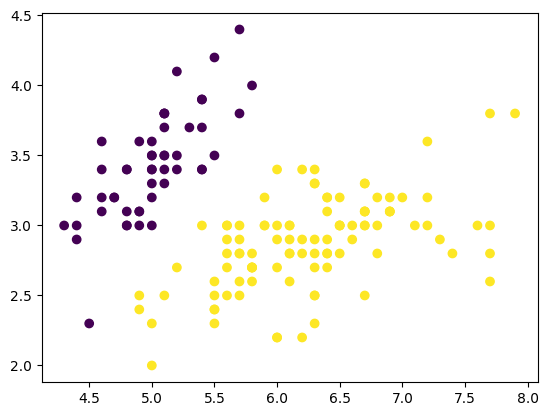

In [79]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [80]:
n_samples, n_features = X.shape

In [81]:
n_samples, n_features

(150, 2)

In [82]:
w = np.zeros(n_features)
b = 0.0


In [83]:
lr = 0.001
lambda_param = 0.01
n_iters = 1000
losses = []

for _ in range(n_iters):
  for idx, x_i in enumerate(X):
    condition = y[idx] * (np.dot(x_i, w) + b) >= 1
    if condition:
      # no loss term
      w = w - lr * (2 * lambda_param * w)
    else:
      # gradient of loss is also calculated
      w = w - lr * (2 * lambda_param * w - np.dot(y[idx], x_i))
      b = b - lr * (-1 * y[idx])

  score = np.dot(X, w) + b
  hinge_losses = np.maximum(0, 1 -  (y * score))
  mean_loss = np.mean(hinge_losses) + lambda_param * np.dot(w, w)
  losses.append(mean_loss)

  if _ % 100 == 0:
    print(f'Epoch: {_}, Loss: {mean_loss}')


Epoch: 0, Loss: 0.6562328363461105
Epoch: 100, Loss: 0.19967571680879814
Epoch: 200, Loss: 0.1711342264856371
Epoch: 300, Loss: 0.16114699599668444
Epoch: 400, Loss: 0.16065959413041642
Epoch: 500, Loss: 0.1605400175570093
Epoch: 600, Loss: 0.1558736257976398
Epoch: 700, Loss: 0.15614470833655797
Epoch: 800, Loss: 0.1540217978174539
Epoch: 900, Loss: 0.15047875913429795


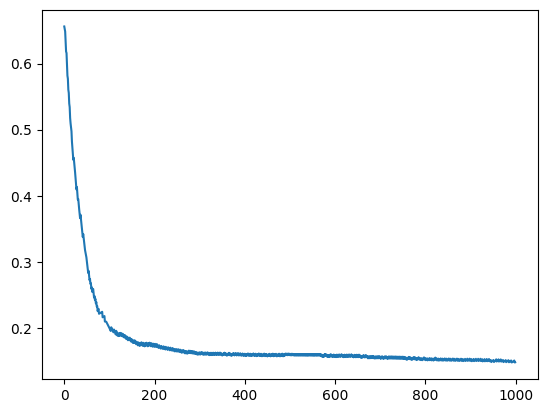

In [84]:
plt.plot(losses)

In [89]:
def predict(X):
  scores = np.dot(X, w) + b
  return np.sign(scores)

In [90]:
y_pred = predict(X)

In [93]:
correct = 0
for i in range(len(y)):
    if y_pred[i] == y[i]:
        correct += 1

accuracy = correct / len(y)

In [94]:
accuracy

0.9933333333333333